## Задание на лабораторную работу

Реализовать классификацию сортов растения ирис (Iris Setosa - 0, Iris Versicolour - 1, Iris
Virginica - 2) по четырем признакам: размерам пестиков и тычинок его цветков.

## Выполнение работы

Поключаем модули

In [1]:
import pandas
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
plt.style.use('seaborn-whitegrid')

Набор данных загружается с помощью библиотеки Pandas. После загрузки данных из файла ```python dataframe = pandas.read_csv("iris.csv", header=None)``` , необходимо разделить столбцы на входные данные (X) и выходные данные (Y).

In [2]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
##print('X=',X)
##print('----------------------------------------------')
##print('Y=',Y)

При решении задач многоклассовой классификации хорошей практикой является
преобразование выходных атрибутов из вектора в матрицу к виду представленных ниже.

|Iris-setosa|Iris-versicolor|Iris-verginica|
|-----------|---------------|--------------|
|1|0|0|
|0|1|0|
|0|0|1|

Для этого необходимо использовать функцию *to_categorical()*

In [3]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)
##print(dummy_y)

Далее надо задать базовую архитектуру сети.

In [4]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

Далее нужно подготовить сеть к обучению. Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:
1. **функцию потерь**, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;
2. **оптимизатор** — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
3. **метрики для мониторинга на этапах обучения и тестирования** — здесь нас будет интересовать только точность (доля правильно классифицированных изображений).

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Теперь можно начинать обучение сети, для чего в случае использования библиотеки Keras
достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель под обучающие
данные.

In [6]:
f = model.fit(X, dummy_y, epochs=170, batch_size=10, validation_split=0.1)

Epoch 1/170
14/14 [==============================] - 0s 11ms/step - loss: 3.2141 - accuracy: 0.3704 - val_loss: 3.1558 - val_accuracy: 0.0000e+00
Epoch 2/170
14/14 [==============================] - 0s 2ms/step - loss: 2.7073 - accuracy: 0.3704 - val_loss: 2.2677 - val_accuracy: 0.0000e+00
Epoch 3/170
14/14 [==============================] - 0s 3ms/step - loss: 2.2858 - accuracy: 0.3704 - val_loss: 1.5541 - val_accuracy: 0.0000e+00
Epoch 4/170
14/14 [==============================] - 0s 3ms/step - loss: 1.9575 - accuracy: 0.3778 - val_loss: 1.1020 - val_accuracy: 0.0000e+00
Epoch 5/170
14/14 [==============================] - 0s 3ms/step - loss: 1.7689 - accuracy: 0.3926 - val_loss: 0.7961 - val_accuracy: 0.2000
Epoch 6/170
14/14 [==============================] - 0s 2ms/step - loss: 1.6165 - accuracy: 0.4074 - val_loss: 0.6945 - val_accuracy: 0.6000
Epoch 7/170
14/14 [==============================] - 0s 3ms/step - loss: 1.5135 - accuracy: 0.3259 - val_loss: 0.6613 - val_accuracy: 0.8

В процессе обучения отображаются четыре величины: потери сети на обучающих данных
и точность сети на обучающих данных, а также потери и точность на данных, не
участвовавших в обучении.

### Начертим график, который наглядно покажет точность обучающих данных и тестируемых данных.

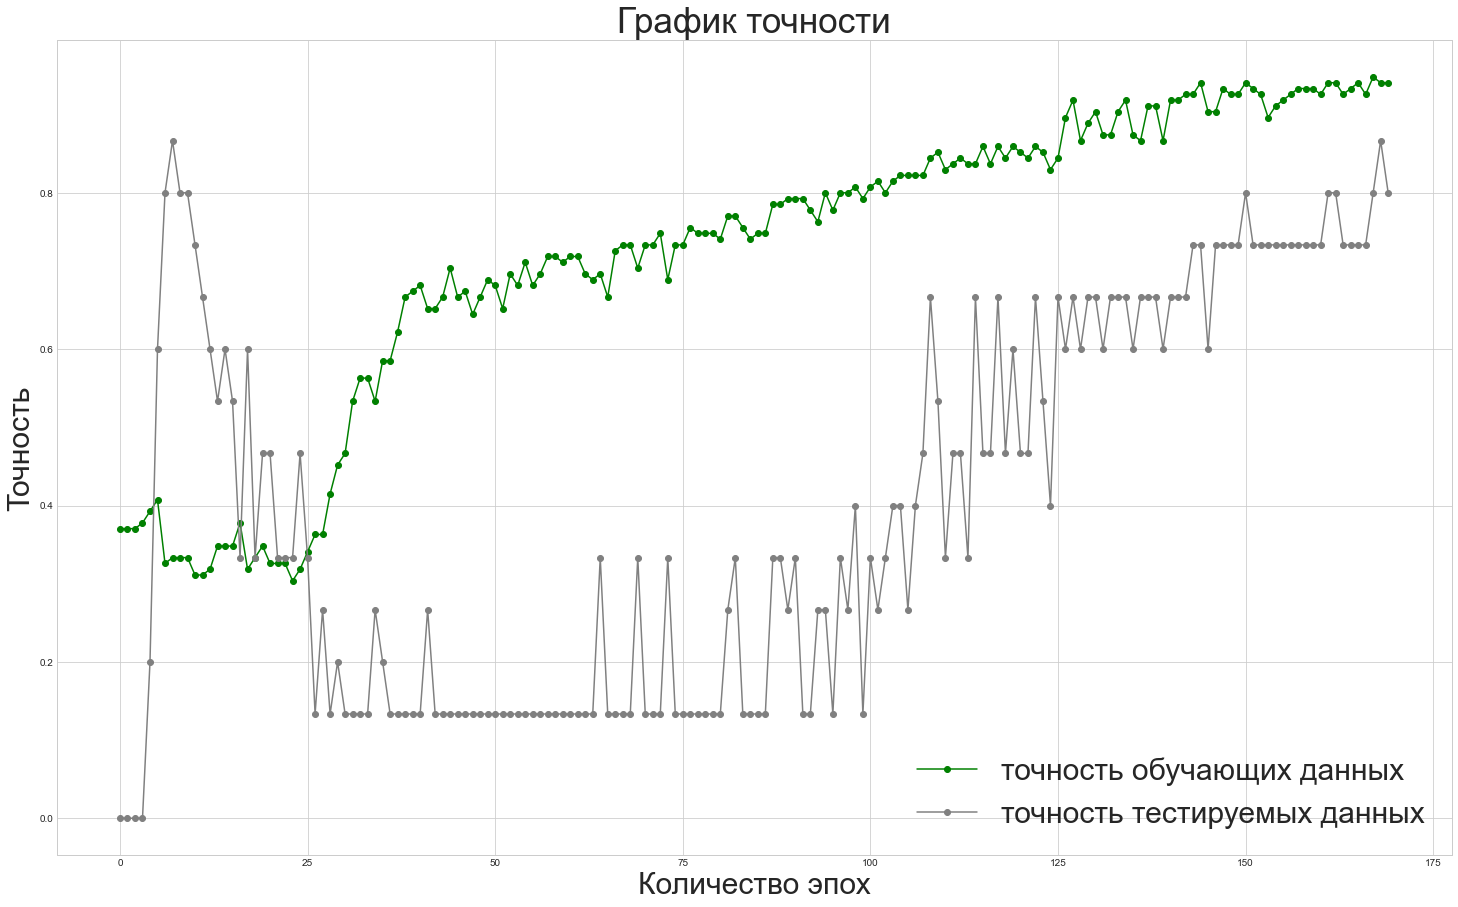

In [7]:
fig, ax = plt.subplots(figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
ax.plot(f.history['accuracy'],color=('green'),marker='o',linewidth=1.5,label='точность обучающих данных')
ax.plot(f.history['val_accuracy'],color=('gray'),marker='o',linewidth=1.5,label='точность тестируемых данных')
## ax.plot(f.history['loss'],color=('red'),marker='o',linewidth=1.5,label='потери')
ax.set_title('График точности',fontsize=35)
ax.set_xlabel("Количество эпох",fontsize=30)
ax.set_ylabel("Точность",fontsize=30)
ax.legend(loc='best',fontsize=30)

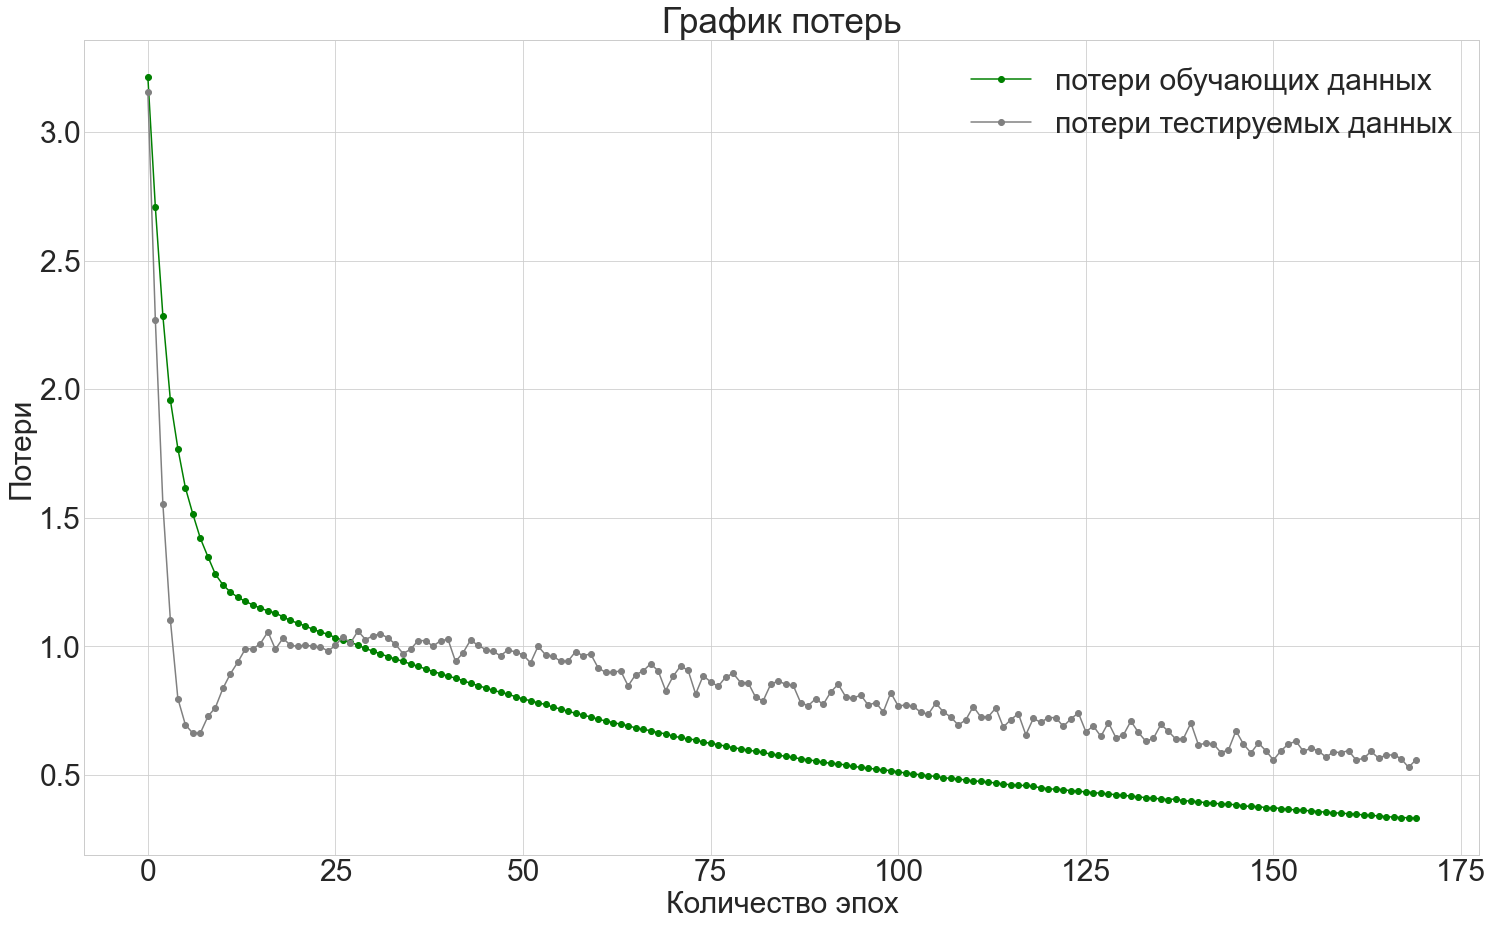

In [8]:
fig, ax = plt.subplots(figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
ax.plot(f.history['loss'],color=('green'),marker='o',linewidth=1.5,label='потери обучающих данных')
ax.plot(f.history['val_loss'],color=('gray'),marker='o',linewidth=1.5,label='потери тестируемых данных')
## ax.plot(f.history['loss'],color=('red'),marker='o',linewidth=1.5,label='потери')
ax.set_title('График потерь',fontsize=35)
ax.set_xlabel("Количество эпох",fontsize=30)
ax.set_ylabel("Потери",fontsize=30)
ax.legend(loc='best',fontsize=30)

## Вопрос 1
### Поменяем архитектуру нейронной сети, а именно поменяем количество слоёв. Добавим еще один слой в нашу нейросеть. Параметры обучения оставим такими же как и были.

In [9]:
model1 = Sequential()
model1.add(Dense(4, activation='relu'))
model1.add(Dense(8, activation='tanh'))
model1.add(Dense(3, activation='softmax'))

model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

f1 = model1.fit(X, dummy_y, epochs=70, batch_size=10, validation_split=0.1)

Epoch 1/70
14/14 [==============================] - 0s 9ms/step - loss: 1.4328 - accuracy: 0.3704 - val_loss: 1.7369 - val_accuracy: 0.0000e+00
Epoch 2/70
14/14 [==============================] - 0s 3ms/step - loss: 1.2538 - accuracy: 0.3704 - val_loss: 1.5764 - val_accuracy: 0.0000e+00
Epoch 3/70
14/14 [==============================] - 0s 3ms/step - loss: 1.0476 - accuracy: 0.3704 - val_loss: 1.3979 - val_accuracy: 0.0000e+00
Epoch 4/70
14/14 [==============================] - 0s 2ms/step - loss: 0.8709 - accuracy: 0.4148 - val_loss: 1.2199 - val_accuracy: 0.0000e+00
Epoch 5/70
14/14 [==============================] - 0s 2ms/step - loss: 0.7767 - accuracy: 0.7333 - val_loss: 1.1178 - val_accuracy: 0.0000e+00
Epoch 6/70
14/14 [==============================] - 0s 3ms/step - loss: 0.7246 - accuracy: 0.7407 - val_loss: 1.0743 - val_accuracy: 0.0000e+00
Epoch 7/70
14/14 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.7407 - val_loss: 1.0705 - val_accuracy: 0.0

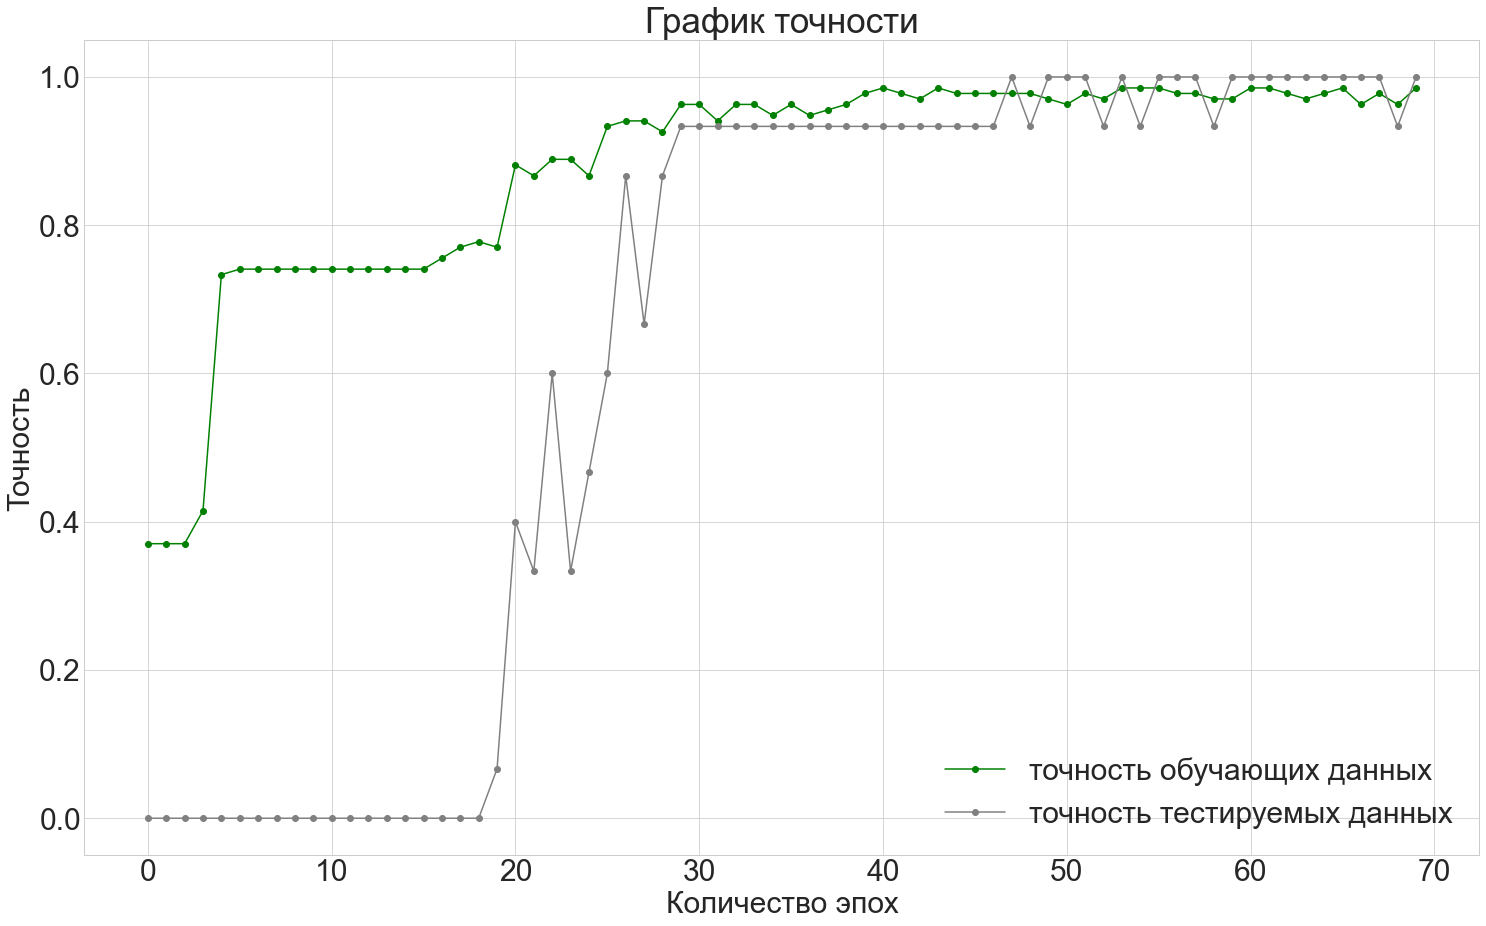

In [10]:
fig, ax = plt.subplots(figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
ax.plot(f1.history['accuracy'],color=('green'),marker='o',linewidth=1.5,label='точность обучающих данных')
ax.plot(f1.history['val_accuracy'],color=('gray'),marker='o',linewidth=1.5,label='точность тестируемых данных')
ax.set_title('График точности',fontsize=35)
ax.set_xlabel("Количество эпох",fontsize=30)
ax.set_ylabel("Точность",fontsize=30)
ax.legend(loc='best',fontsize=30)

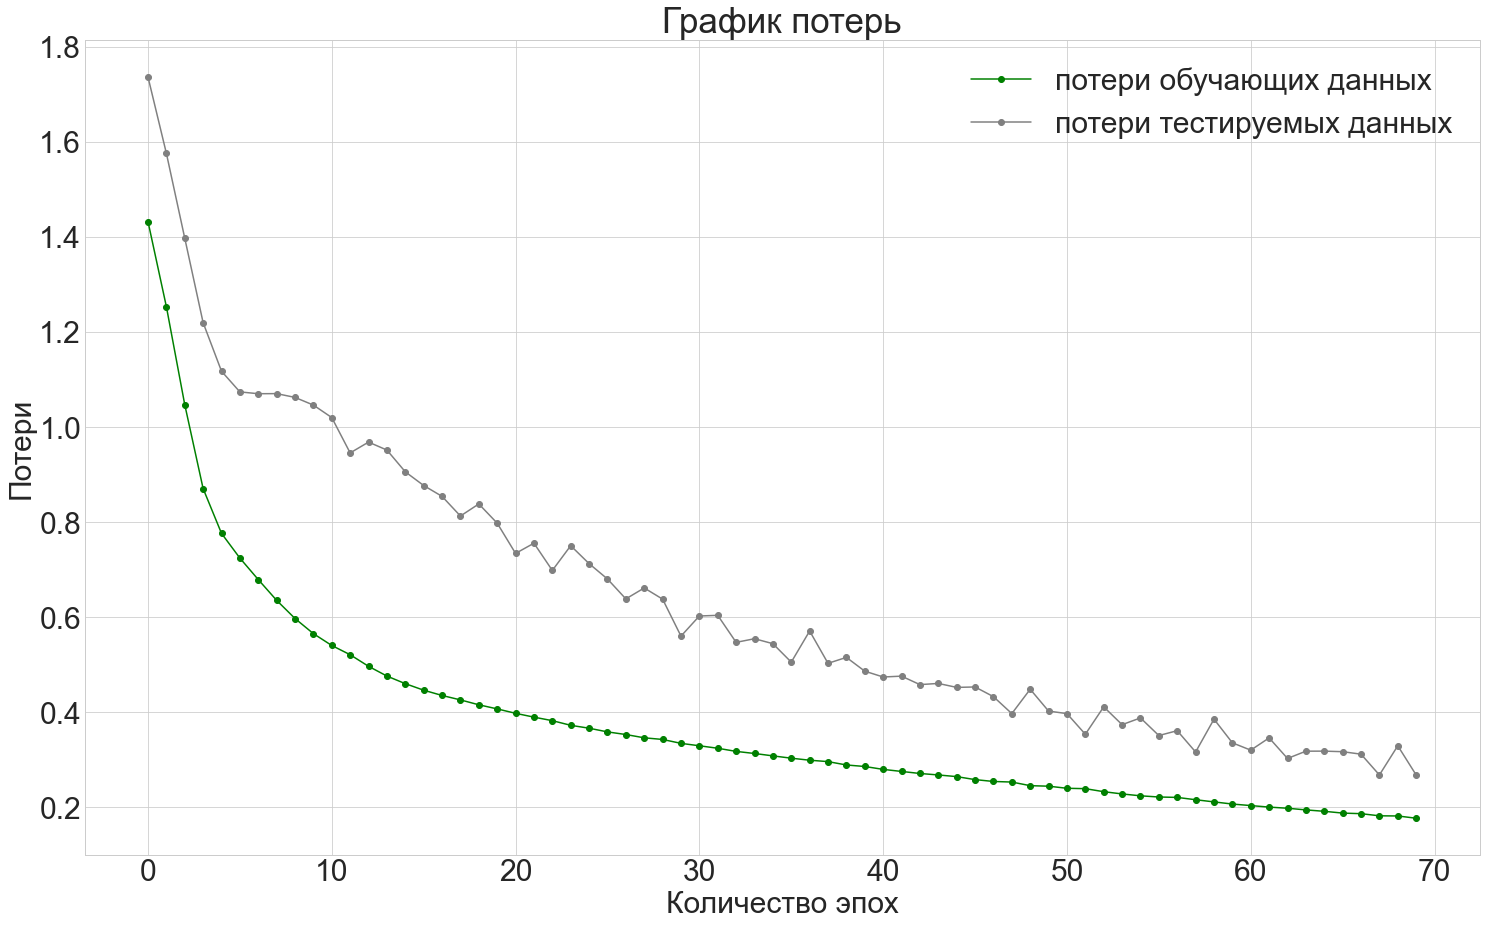

In [11]:
fig, ax = plt.subplots(figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
ax.plot(f1.history['loss'],color=('green'),marker='o',linewidth=1.5,label='потери обучающих данных')
ax.plot(f1.history['val_loss'],color=('gray'),marker='o',linewidth=1.5,label='потери тестируемых данных')
ax.set_title('График потерь',fontsize=35)
ax.set_xlabel("Количество эпох",fontsize=30)
ax.set_ylabel("Потери",fontsize=30)
ax.legend(loc='best',fontsize=30)

### Вопрос 2
### Поменяем параметры обучения (function fit) в моделях которые были ранее представлены.

In [12]:
## зададим параметры обучения для 1 сети
f3 = model.fit(X, dummy_y, epochs=175,batch_size=20, validation_split=0.1,verbose=0)

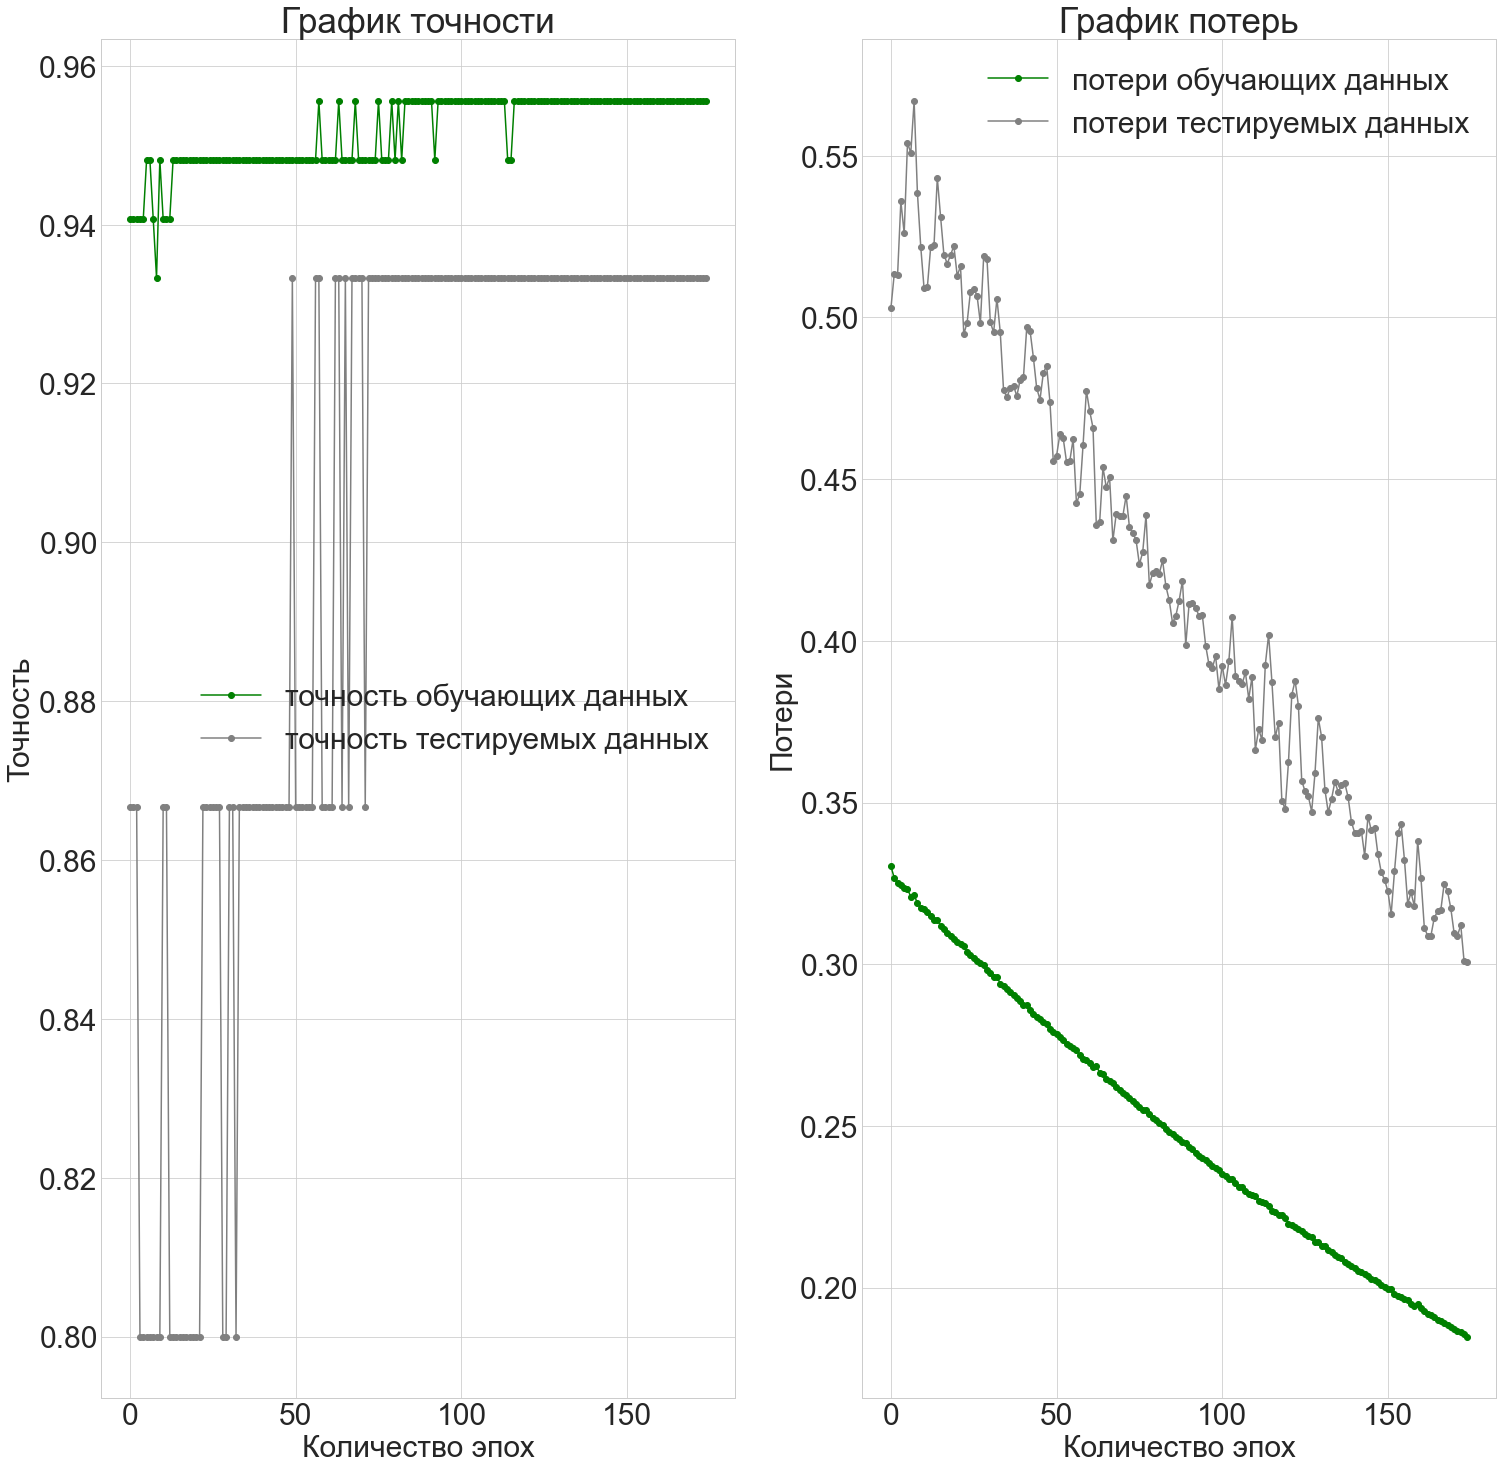

In [13]:
figure = plt.figure(figsize=(25, 25))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)
##fig, ax = plt.subplots(figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
ax1.plot(f3.history['accuracy'],color=('green'),marker='o',linewidth=1.5,label='точность обучающих данных')
ax1.plot(f3.history['val_accuracy'],color=('gray'),marker='o',linewidth=1.5,label='точность тестируемых данных')
## ax.plot(f.history['loss'],color=('red'),marker='o',linewidth=1.5,label='потери')
ax1.set_title('График точности',fontsize=35)
ax1.set_xlabel("Количество эпох",fontsize=30)
ax1.set_ylabel("Точность",fontsize=30)
ax1.legend(loc='best',fontsize=30)

plt.rcParams.update({'font.size': 30})
ax2.plot(f3.history['loss'],color=('green'),marker='o',linewidth=1.5,label='потери обучающих данных')
ax2.plot(f3.history['val_loss'],color=('gray'),marker='o',linewidth=1.5,label='потери тестируемых данных')
ax2.set_title('График потерь',fontsize=35)
ax2.set_xlabel("Количество эпох",fontsize=30)
ax2.set_ylabel("Потери",fontsize=30)
ax2.legend(loc='best',fontsize=30)

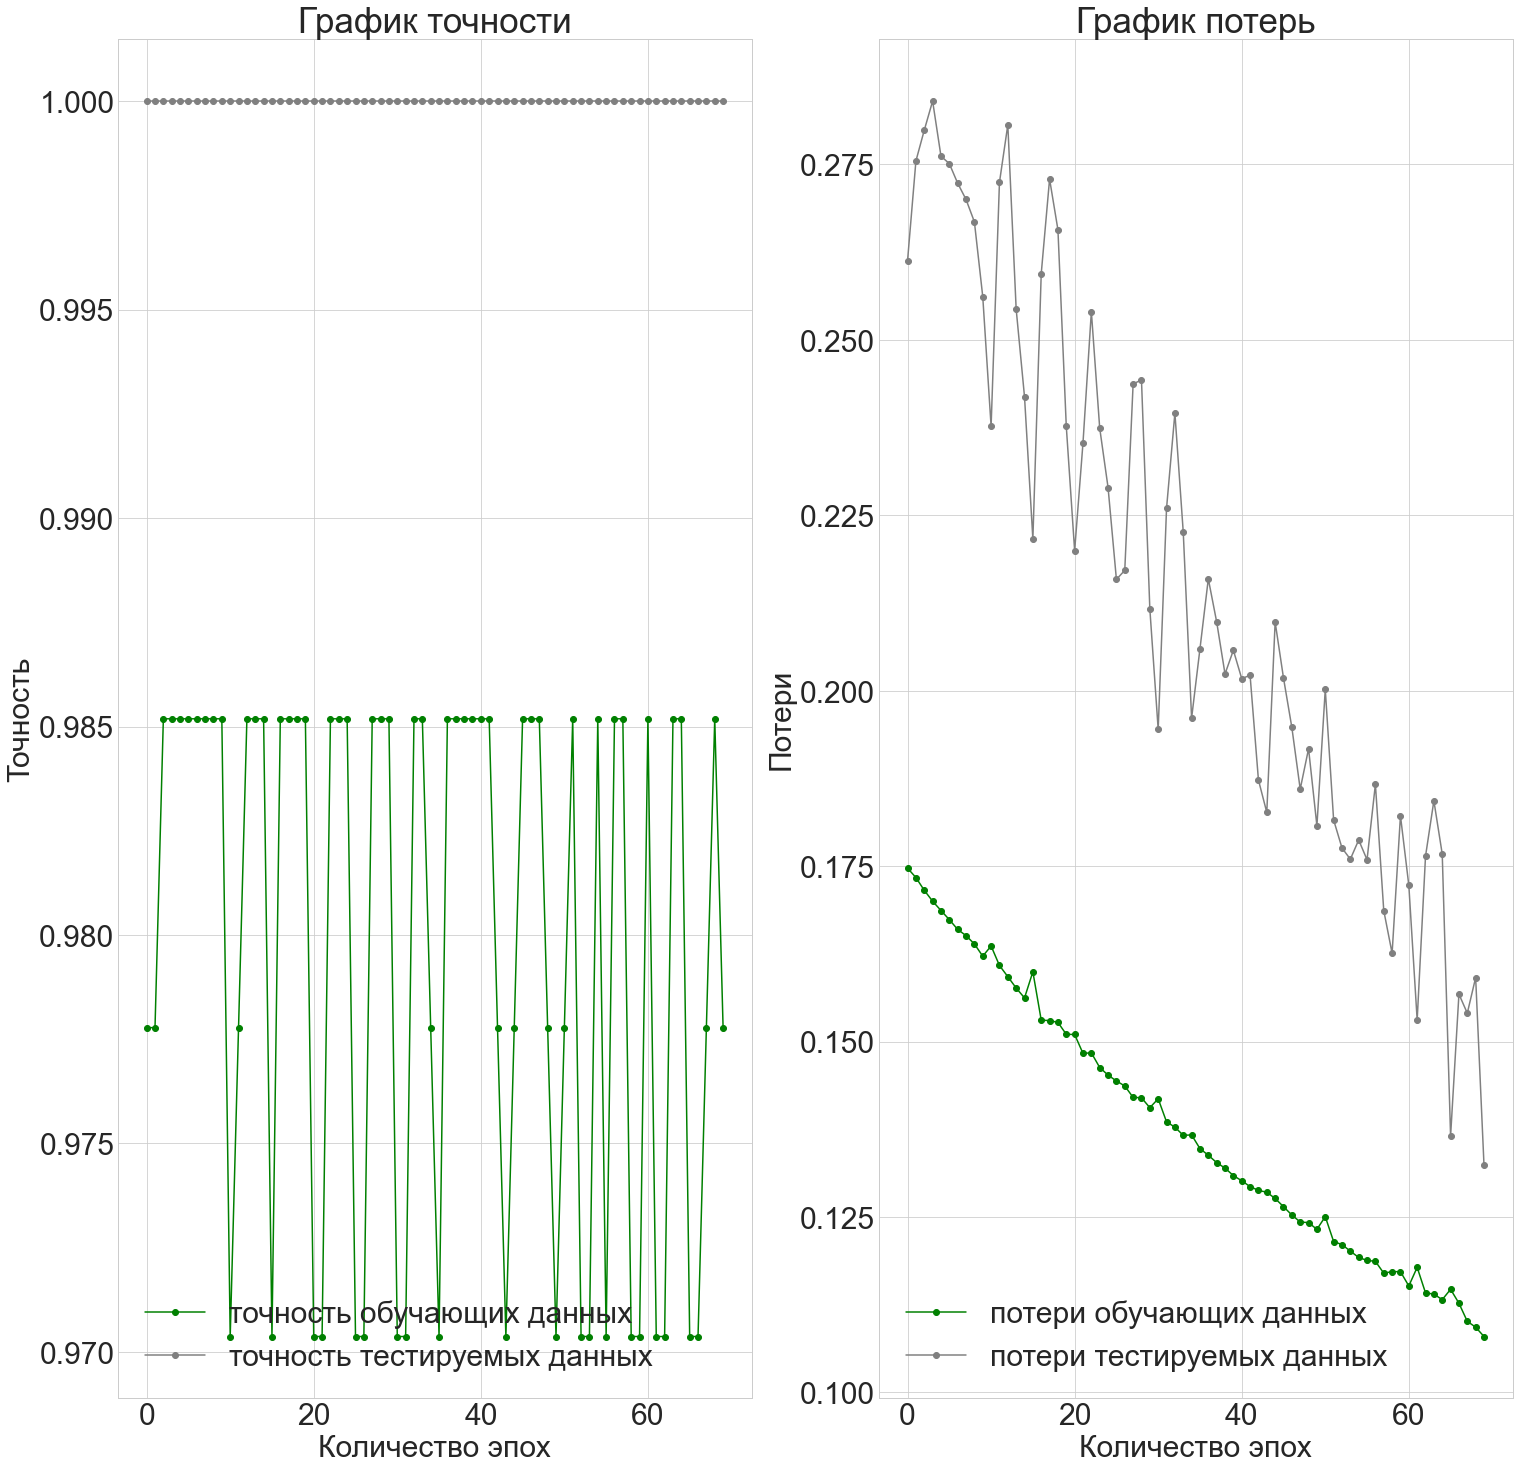

In [14]:
## зададим параметры обучения для 2 сети
f4 = model1.fit(X, dummy_y,batch_size=20,epochs=70, validation_split=0.1,verbose=0)

figure = plt.figure(figsize=(25, 25))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)
##fig, ax = plt.subplots(figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
ax1.plot(f4.history['accuracy'],color=('green'),marker='o',linewidth=1.5,label='точность обучающих данных')
ax1.plot(f4.history['val_accuracy'],color=('gray'),marker='o',linewidth=1.5,label='точность тестируемых данных')
## ax.plot(f.history['loss'],color=('red'),marker='o',linewidth=1.5,label='потери')
ax1.set_title('График точности',fontsize=35)
ax1.set_xlabel("Количество эпох",fontsize=30)
ax1.set_ylabel("Точность",fontsize=30)
ax1.legend(loc='best',fontsize=30)

plt.rcParams.update({'font.size': 30})
ax2.plot(f4.history['loss'],color=('green'),marker='o',linewidth=1.5,label='потери обучающих данных')
ax2.plot(f4.history['val_loss'],color=('gray'),marker='o',linewidth=1.5,label='потери тестируемых данных')
ax2.set_title('График потерь',fontsize=35)
ax2.set_xlabel("Количество эпох",fontsize=30)
ax2.set_ylabel("Потери",fontsize=30)
ax2.legend(loc='best',fontsize=30)

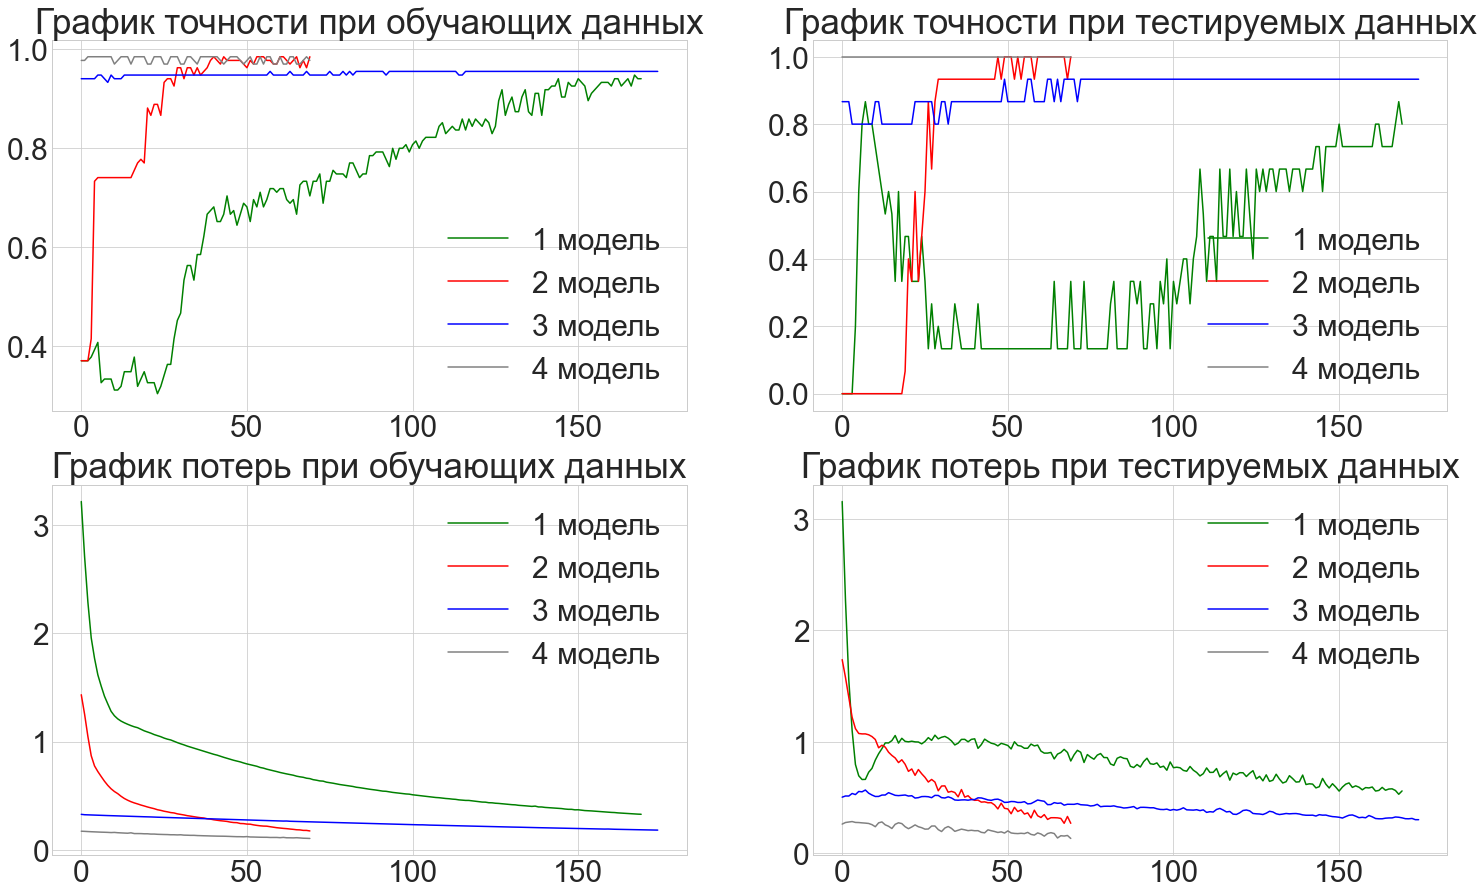

In [18]:
fig, axes = plt.subplots(2,2,figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
axes[0,0].plot(f.history['accuracy'],color=('green'),linewidth=1.5,label='1 модель')
axes[0,0].plot(f1.history['accuracy'],color=('red'),linewidth=1.5,label='2 модель')
axes[0,0].plot(f3.history['accuracy'],color=('blue'),linewidth=1.5,label='3 модель')
axes[0,0].plot(f4.history['accuracy'],color=('gray'),linewidth=1.5,label='4 модель')
axes[0,0].set_title('График точности при обучающих данных',fontsize=35)
axes[0,0].legend(loc='best')

axes[0,1].plot(f.history['val_accuracy'],color=('green'),linewidth=1.5,label='1 модель')
axes[0,1].plot(f1.history['val_accuracy'],color=('red'),linewidth=1.5,label='2 модель')
axes[0,1].plot(f3.history['val_accuracy'],color=('blue'),linewidth=1.5,label='3 модель')
axes[0,1].plot(f4.history['val_accuracy'],color=('gray'),linewidth=1.5,label='4 модель')
axes[0,1].legend(loc='best')
axes[0,1].set_title('График точности при тестируемых данных',fontsize=35)

axes[1,0].plot(f.history['loss'],color=('green'),linewidth=1.5,label='1 модель')
axes[1,0].plot(f1.history['loss'],color=('red'),linewidth=1.5,label='2 модель')
axes[1,0].plot(f3.history['loss'],color=('blue'),linewidth=1.5,label='3 модель')
axes[1,0].plot(f4.history['loss'],color=('gray'),linewidth=1.5,label='4 модель')
axes[1,0].set_title('График потерь при обучающих данных',fontsize=35)
axes[1,0].legend(loc='best')

axes[1,1].plot(f.history['val_loss'],color=('green'),linewidth=1.5,label='1 модель')
axes[1,1].plot(f1.history['val_loss'],color=('red'),linewidth=1.5,label='2 модель')
axes[1,1].plot(f3.history['val_loss'],color=('blue'),linewidth=1.5,label='3 модель')
axes[1,1].plot(f4.history['val_loss'],color=('gray'),linewidth=1.5,label='4 модель')
axes[1,1].set_title('График потерь при тестируемых данных',fontsize=35)
axes[1,1].legend(loc='best')




## Вывод
3 модель показывает себя лучше всех других.